# Regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Predictive-models" data-toc-modified-id="Predictive-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predictive models</a></span><ul class="toc-item"><li><span><a href="#1-predictor" data-toc-modified-id="1-predictor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1 predictor</a></span></li><li><span><a href="#2-predictor" data-toc-modified-id="2-predictor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2 predictor</a></span></li><li><span><a href="#Many-predictors" data-toc-modified-id="Many-predictors-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Many predictors</a></span></li><li><span><a href="#Many-more-predictors" data-toc-modified-id="Many-more-predictors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Many more predictors</a></span></li></ul></li><li><span><a href="#Regression-metrics" data-toc-modified-id="Regression-metrics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression metrics</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [39]:
import pandas as pd
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

In regression problems:
 * We want to **predict** a continuous variable
 * Optimizing a given metric

## Data exploration

Import dataset

In [4]:
df = pd.read_csv("../datasets/boston.csv")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

Boston columns documentation:

Predictor features:
 * CRIM - per capita crime rate by town
 * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 * INDUS - proportion of non-retail business acres per town.
 * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 * NOX - nitric oxides concentration (parts per 10 million)
 * RM - average number of rooms per dwelling
 * AGE - proportion of owner-occupied units built prior to 1940
 * DIS - weighted distances to five Boston employment centres
 * RAD - index of accessibility to radial highways
 * TAX - full-value property-tax rate per \$10000
 * PTRATIO - pupil-teacher ratio by town
 * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 * LSTAT - % lower status of the population
 

Target feature
* MEDV - Median value of owner-occupied homes in $1000's

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

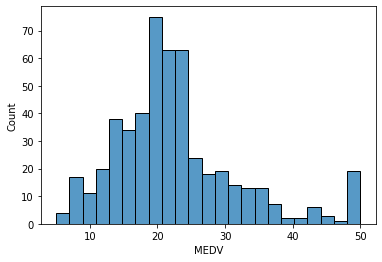

In [41]:
sns.histplot(df.MEDV)

Exploring dataset

In [16]:
for colname in df.columns:
    print(f"{colname: <12} {df[colname].nunique()}")

CRIM         504
ZN           26
INDUS        76
CHAS         2
NOX          81
RM           446
AGE          356
DIS          412
RAD          9
TAX          66
PTRATIO      46
B            357
LSTAT        455
MEDV         229


In [22]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [25]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

The following two predictors are the most correlated features with the target variable `MEDV`:
 * `LSTAT`
 * `RM`

## Predictive models

### 1 predictor

In [17]:
from sklearn.linear_model import LinearRegression

In [140]:
lr = LinearRegression()

In [141]:
# 1 predictor, LSTAT
X=df[["LSTAT"]]
# target
y=df["MEDV"]

In [142]:
lr.fit(X, y)

LinearRegression()

In [143]:
lr.predict(X)[:10]

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693])

In [33]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

 * For inference matters, the exact coefficients are important (explainability)
 * For only prediction matters, the exact coefficients are not *very* important

The prediction score is *more* important

In [34]:
lr.score(X, y)

0.5441462975864797

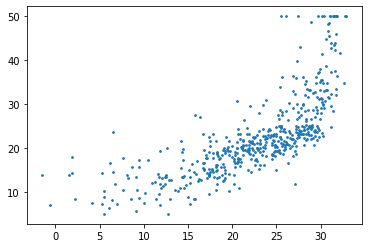

In [43]:
plt.scatter(lr.predict(X), y, s=3)

### 2 predictor

In [44]:
lr = LinearRegression()

In [52]:
# 2 predictors, LSTAT and RM
X=df[["LSTAT", "RM"]]
# target
y=df["MEDV"]

In [53]:
lr.fit(X, y)

LinearRegression()

In [54]:
lr.predict(X)[:10]

array([28.94101368, 25.48420566, 32.65907477, 32.40652   , 31.63040699,
       28.05452701, 21.28707846, 17.78559653,  8.10469338, 18.24650673])

In [55]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

In [56]:
lr.score(X, y)

0.6385616062603403

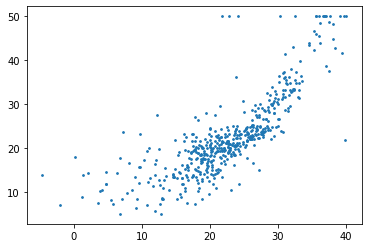

In [57]:
plt.scatter(lr.predict(X), y, s=3)

### Many predictors

In [58]:
lr = LinearRegression()

In [59]:
# all predictors but the MEDV
X=df.drop("MEDV", axis=1)
# target
y=df["MEDV"]

In [60]:
lr.fit(X, y)

LinearRegression()

In [61]:
lr.predict(X)[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [62]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

In [63]:
lr.score(X, y)

0.7406426641094094

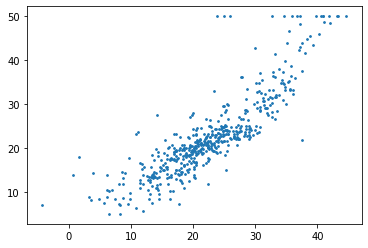

In [64]:
plt.scatter(lr.predict(X), y, s=3)

### Many more predictors

In [150]:
df2 = df.copy()

In [151]:
df2.shape

(506, 14)

In [152]:
df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [153]:
pairs = []

for i1 in range(len(df2.columns) - 1):
    col1 = df2.columns[i1]
    for i2 in range(i1, len(df2.columns) - 1):
        col2 = df2.columns[i2]
        
        pairs.append((col1, col2))

In [154]:
len(pairs)

91

In [155]:
pairs

[('CRIM', 'CRIM'),
 ('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'ZN'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'INDUS'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'CHAS'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'NOX'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NOX', 'PTRATIO'),
 ('NOX', 'B'),
 ('NOX', 'LSTAT'),
 ('RM', 

In [156]:
for col1, col2 in pairs:
    df2[f"{col1} * {col2}"] = df2[col1] * df2[col2]

In [157]:
df2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'TAX * TAX', 'TAX * PTRATIO', 'TAX * B', 'TAX * LSTAT',
       'PTRATIO * PTRATIO', 'PTRATIO * B', 'PTRATIO * LSTAT', 'B * B',
       'B * LSTAT', 'LSTAT * LSTAT'],
      dtype='object', length=105)

In [158]:
# 91 + 14
df2.shape

(506, 105)

In [159]:
lr = LinearRegression()

In [160]:
# all predictors but the MEDV
X=df2.drop("MEDV", axis=1)
# target
y=df2["MEDV"]

In [161]:
lr.fit(X, y)

LinearRegression()

In [162]:
lr.predict(X)[:10]

array([24.7918342 , 22.70683946, 32.63160085, 31.98777402, 32.14243885,
       26.0609507 , 21.34306433, 18.21773931, 16.27112006, 20.46907636])

In [163]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

In [164]:
lr.score(X, y)

0.9289961714593018

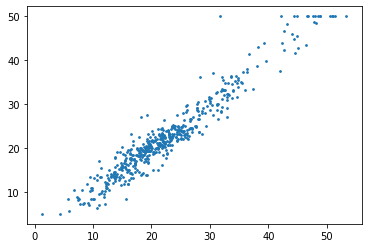

In [165]:
plt.scatter(lr.predict(X), y, s=3)

## Regression metrics

A metric is a function of:
 * Real target values
 * Predicted target values

$$L(y_i, \hat{y}_i)$$

A metric should be defined along with **business understanding**, and **before fitting** any model

You compare:
 * different models with
 * the same metric

There is **NO POINT** in comparing:
 * different models (or the same model) with
 * different metrics

Here, we show 4 typical regression metrics for the same model (**not** with the aim of comparing them!!)

In [166]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

In [167]:
r2_score(
    y_true=y,
    y_pred=lr.predict(X)
)

0.9289961714593018

In [168]:
mean_squared_error(
    y_true=y,
    y_pred=lr.predict(X)
)

5.99411169079422

In [169]:
mean_absolute_error(
    y_true=y,
    y_pred=lr.predict(X)
)

1.8098010518398968

In [170]:
mean_squared_log_error(
    y_true=y,
    y_pred=lr.predict(X)
)

0.016011282934201707

## Summary

`sklearn` model construction process and evaluation:
 * Choose a regressor
 * Choose the predictors' array `X` and the target variable `y`
 * `.fit` the model
 * `.predict` on test (or train) set of data
 * `.score` your model on test (or train) set of data

Metrics:
 * Should be defined a-priori, understanding the problem from a human point of view
 * Are the mathematical translation of the human criteria of good fitting
 * Are better understood (for beginners) in the case of classification (to come)